In [52]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [53]:
import numpy as np
import pandas as pd

In [54]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [55]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [56]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [57]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [58]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [59]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [60]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [61]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


In [62]:
# Calculate the date 1 year ago from the last data point in the database
previous_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)


In [63]:
# Perform a query to retrieve the data and precipitation scores
precip_12_mo = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > previous_year).\
    order_by(Measurement.date).all()
for x in precip_12_mo:
    print(x)

('2016-08-24', 0.08)
('2016-08-24', 2.15)
('2016-08-24', 2.28)
('2016-08-24', None)
('2016-08-24', 1.22)
('2016-08-24', 2.15)
('2016-08-24', 1.45)
('2016-08-25', 0.08)
('2016-08-25', 0.08)
('2016-08-25', 0.0)
('2016-08-25', 0.0)
('2016-08-25', 0.21)
('2016-08-25', 0.06)
('2016-08-25', 0.11)
('2016-08-26', 0.0)
('2016-08-26', 0.03)
('2016-08-26', 0.02)
('2016-08-26', 0.04)
('2016-08-26', 0.0)
('2016-08-26', 0.01)
('2016-08-27', 0.0)
('2016-08-27', 0.18)
('2016-08-27', 0.02)
('2016-08-27', 0.0)
('2016-08-27', 0.12)
('2016-08-27', None)
('2016-08-28', 0.01)
('2016-08-28', 0.14)
('2016-08-28', 0.14)
('2016-08-28', 0.14)
('2016-08-28', 0.6)
('2016-08-28', 2.07)
('2016-08-29', 0.0)
('2016-08-29', 0.17)
('2016-08-29', 0.04)
('2016-08-29', None)
('2016-08-29', 0.0)
('2016-08-29', 0.35)
('2016-08-29', 0.9)
('2016-08-30', 0.0)
('2016-08-30', 0.0)
('2016-08-30', 0.02)
('2016-08-30', 0.0)
('2016-08-30', 0.0)
('2016-08-30', 0.05)
('2016-08-31', 0.13)
('2016-08-31', 0.1)
('2016-08-31', None)
('2016-

In [64]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip_12_mo)
precip_df.head()


,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [65]:
# Sort the dataframe by date
precip_df.sort_values(by=['date'])
precip_df.head()


,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


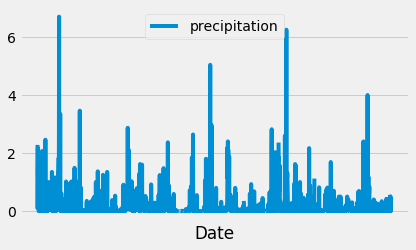

In [67]:
# Plot the dataframe as a horizontal bar chart using pandas plotting

precip_df.plot()
plt.xlabel("Date")
plt.legend(["precipitation"],loc='upper center')
plt.tight_layout()
plt.xticks([])
plt.show()


In [69]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()


,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [71]:
# Design a query to show how many stations are available in this dataset?
stations_count = session.query(Station).count()
print(stations_count)

9


In [72]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.id)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).all()
for x in most_active_stations:
    print(x)


('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [73]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
sel = [func.min(Measurement.tobs),
      func.max(Measurement.tobs),
      func.avg(Measurement.tobs)]
temp = session.query(*sel).\
    filter(Measurement.station == 'USC00519281').all()
print(temp)


[(54.0, 85.0, 71.66378066378067)]


In [80]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station
df = session.query(Measurement.station,Measurement.date,Measurement.tobs).\
    filter(Measurement.date > previous_year).\
    filter(Measurement.station == "USC00519281").all()



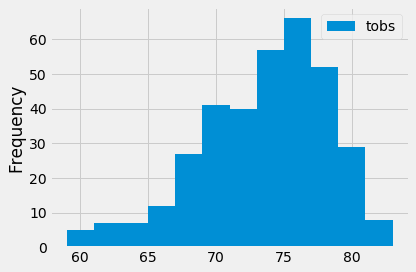

In [90]:
# Plot the results as a histogram
most_active_df=pd.DataFrame(df)
plt.hist(most_active_df["tobs"],bins=12)
plt.ylabel("Frequency")
plt.legend(["tobs"],loc='upper right')
plt.tight_layout()
plt.show()

